In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

df = pd.read_csv('indexData.csv')
df

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0
...,...,...,...,...,...,...,...,...
112452,N100,2021-05-27,1241.119995,1251.910034,1241.119995,1247.069946,1247.069946,379696400.0
112453,N100,2021-05-28,1249.469971,1259.209961,1249.030029,1256.599976,1256.599976,160773400.0
112454,N100,2021-05-31,1256.079956,1258.880005,1248.140015,1248.930054,1248.930054,91173700.0
112455,N100,2021-06-01,1254.609985,1265.660034,1254.609985,1258.579956,1258.579956,155179900.0


In [38]:
dfn = df[df['Index'] == 'NYA'].dropna()

In [39]:
dfn

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.000000e+00
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.000000e+00
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.000000e+00
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.000000e+00
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.000000e+00
...,...,...,...,...,...,...,...,...
13943,NYA,2021-05-24,16375.000000,16508.519530,16375.000000,16464.689450,16464.689450,2.947400e+09
13944,NYA,2021-05-25,16464.689450,16525.810550,16375.150390,16390.189450,16390.189450,3.420870e+09
13945,NYA,2021-05-26,16390.189450,16466.339840,16388.320310,16451.960940,16451.960940,3.674490e+09
13946,NYA,2021-05-27,16451.960940,16546.359380,16451.960940,16531.949220,16531.949220,5.201110e+09


In [40]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13947 entries, 0 to 13947
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Index      13947 non-null  object 
 1   Date       13947 non-null  object 
 2   Open       13947 non-null  float64
 3   High       13947 non-null  float64
 4   Low        13947 non-null  float64
 5   Close      13947 non-null  float64
 6   Adj Close  13947 non-null  float64
 7   Volume     13947 non-null  float64
dtypes: float64(6), object(2)
memory usage: 980.6+ KB


In [41]:
df_data = dfn.copy()

In [42]:
df_data['Date'] = pd.to_datetime(df_data['Date'])

In [43]:
df_data['day_difference'] = df_data['Date'].diff().dt.days

In [44]:
df_data['day_difference'].value_counts()

day_difference
1.0    10889
3.0     2556
4.0      332
2.0      165
5.0        3
7.0        1
Name: count, dtype: int64

In [45]:
df_data = dfn.copy()

In [46]:
df_data['Date'] = pd.to_datetime(df_data['Date'])

In [47]:
df_data['day_difference'] = df_data['Date'].diff().dt.days

In [48]:
df_data['day_difference'].value_counts()

day_difference
1.0    10889
3.0     2556
4.0      332
2.0      165
5.0        3
7.0        1
Name: count, dtype: int64

In [49]:
df_data['Adj Close'].values.reshape(-1, 1)

array([[  528.690002],
       [  527.210022],
       [  527.840027],
       ...,
       [16451.96094 ],
       [16531.94922 ],
       [16555.66016 ]])

In [50]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_data['Adj Close'].values.reshape(-1, 1))

In [51]:
scaled_data

array([[-0.96274432],
       [-0.96310748],
       [-0.96295289],
       ...,
       [ 2.94450646],
       [ 2.96413398],
       [ 2.96995217]])

In [52]:
window_size = 3

In [53]:
X, y, y_gen = [], [], []

for i in range(window_size, len(scaled_data)):
  X.append(scaled_data[i-window_size:i, 0])
  y.append(scaled_data[i, 0])
  y_gen.append(scaled_data[i - window_size: i + 1, 0])

In [54]:
X, y, y_gen = np.array(X), np.array(y), np.array(y_gen)
print(X[0])
print(y[0])
print(y_gen[0])

[-0.96274432 -0.96310748 -0.96295289]
-0.9621480527978078
[-0.96274432 -0.96310748 -0.96295289 -0.96214805]


In [55]:
X = np.reshape(X, (X.shape[0], X.shape[1], 1))
y_gen = np.reshape(y_gen, (y_gen.shape[0], y_gen.shape[1], 1))

In [56]:
X.shape

(13944, 3, 1)

In [57]:
y_gen.shape

(13944, 4, 1)

In [58]:
test_split = 0.2
split_index = int(len(y) * (1-test_split))
train_x = X[:split_index]
# train_y = y[:split_index]
test_x = X[(split_index + window_size - 1):]
test_y = y[(split_index + window_size - 1):]

train_y_gen = y_gen[:split_index]
test_y_gen = y_gen[(split_index + window_size - 1):]

In [59]:
# indices = np.arange(len(train_y))
# np.random.shuffle(indices)
# train_x = train_x[indices]
# # train_y = train_y[indices]
# train_y_gen = train_y_gen[indices]

In [60]:
print(train_x.shape)


(11155, 3, 1)


In [61]:
# parameters
batch_size = 128
learning_rate = 0.0001
num_epochs = 10
input_size_gen = (1, window_size)
input_size_disc = (1, window_size+1)

In [62]:
def create_generator():
    generator = tf.keras.Sequential()
    generator.add(tf.keras.Input(shape=(window_size,1)))
    generator.add(tf.keras.layers.GRU(1024, return_sequences=True))
    generator.add(tf.keras.layers.GRU(512, return_sequences=True))
    generator.add(tf.keras.layers.GRU(256))
    generator.add(tf.keras.layers.Dense(128))
    generator.add(tf.keras.layers.Dense(64))
    generator.add(tf.keras.layers.Dense(1))
    generator.add(tf.keras.layers.Reshape((1,)))
    generator.add(tf.keras.layers.Dropout(0.2))

    return generator

In [63]:
def create_discrimanator():
    discrimator = tf.keras.Sequential()
    discrimator.add(tf.keras.Input(shape=(window_size + 1,1)))
    discrimator.add(tf.keras.layers.Conv1D(32, kernel_size=3, strides=1, padding='same', activation='leaky_relu'))
    discrimator.add(tf.keras.layers.Conv1D(64, kernel_size=3, strides=1, padding='same', activation='leaky_relu'))
    discrimator.add(tf.keras.layers.Conv1D(128, kernel_size=3, strides=1, padding='same', activation='leaky_relu'))
    discrimator.add(tf.keras.layers.Flatten())
    discrimator.add(tf.keras.layers.Dense(220, activation='leaky_relu'))
    discrimator.add(tf.keras.layers.BatchNormalization())
    discrimator.add(tf.keras.layers.Dense(220, activation='relu'))
    discrimator.add(tf.keras.layers.BatchNormalization())
    discrimator.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    discrimator.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])

    return discrimator

In [64]:
generator = create_generator()
discriminator = create_discrimanator()

In [65]:
train_x[0].shape

(3, 1)

In [66]:
generated_sample = generator(train_x[:1], training=False)
# fake_data = tf.concat([train_x[0], generated_sample], 1)
train_y_gen[:1].shape
discriminator(train_y_gen[:1])
discriminator.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 4, 32)             128       
                                                                 
 conv1d_4 (Conv1D)           (None, 4, 64)             6208      
                                                                 
 conv1d_5 (Conv1D)           (None, 4, 128)            24704     
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 220)               112860    
                                                                 
 batch_normalization_2 (Bat  (None, 220)               880       
 chNormalization)                                                
                                                      

In [67]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [68]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [69]:
generator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.0, beta_2=0.9)
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.0, beta_2=0.9)

In [70]:
def train_step(x_real, y_real):
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        y_fake = generator(x_real)
        # fake_data = tf.concat([train_x[0], y_fake], 1)
        fake_data = tf.concat([y_real[:, :window_size, :], tf.reshape(y_fake, (-1, 1, 1))], axis=1)
        real_output = discriminator(y_real)
        fake_output = discriminator(fake_data)
        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

        generator_gradients = gen_tape.gradient(gen_loss, generator.trainable_variables)
        discriminator_gradients = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

        generator_optimizer.apply_gradients(zip(generator_gradients, generator.trainable_variables))
        discriminator_optimizer.apply_gradients(zip(discriminator_gradients, discriminator.trainable_variables))

        return gen_loss, disc_loss

In [71]:
def train(epochs=50):
    num_batches = len(train_x) // batch_size
    for epoch in range(epochs):
        gen_loss_epoch = []
        disc_loss_epoch = []
        for i in range(num_batches):
            #for x, y_gen in zip(train_x, train_y_gen):
            start_idx = i * batch_size
            end_idx = start_idx + batch_size
            x_batch = train_x[start_idx:end_idx]
            y_gen_batch = train_y_gen[start_idx:end_idx]
            gen_loss, disc_loss = train_step(x_batch, y_gen_batch)
            # print("gen_loss ", gen_loss.numpy())
            # print("disc_loss ", disc_loss.numpy())
            gen_loss_epoch.append(gen_loss.numpy())
            disc_loss_epoch.append(disc_loss.numpy())

        print(f'[{epoch+1}/{epochs}] LossD: {np.mean(disc_loss_epoch)} LossG:{np.mean(gen_loss_epoch)}')

    return gen_loss_epoch, disc_loss_epoch

In [72]:
gen_loss_epoch, disc_loss_epoch = train()

/home/rol3ert99/.local/lib/python3.10/site-packages/keras/src/backend.py:5818: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


[1/50] LossD: 1.3851267099380493 LossG:0.6937373280525208
[2/50] LossD: 1.3856885433197021 LossG:0.6937329769134521
[3/50] LossD: 1.3851556777954102 LossG:0.6939423680305481
[4/50] LossD: 1.384395956993103 LossG:0.6942963004112244
[5/50] LossD: 1.3832519054412842 LossG:0.6947305798530579
[6/50] LossD: 1.3820178508758545 LossG:0.6954219341278076
[7/50] LossD: 1.3797986507415771 LossG:0.6966336369514465
[8/50] LossD: 1.377281904220581 LossG:0.6982082724571228
[9/50] LossD: 1.3732637166976929 LossG:0.7003605961799622
[10/50] LossD: 1.3690805435180664 LossG:0.7027806639671326
[11/50] LossD: 1.364982008934021 LossG:0.7059426307678223
[12/50] LossD: 1.359756588935852 LossG:0.7088444232940674
[13/50] LossD: 1.3536458015441895 LossG:0.7127736210823059
[14/50] LossD: 1.3483569622039795 LossG:0.7180461883544922
[15/50] LossD: 1.340531826019287 LossG:0.7225720882415771
[16/50] LossD: 1.337764859199524 LossG:0.7247328162193298
[17/50] LossD: 1.3350118398666382 LossG:0.7270289659500122
[18/50] Loss

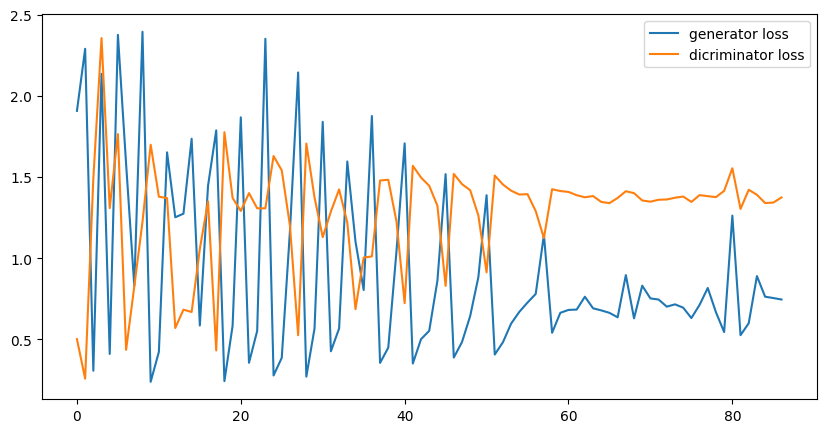

In [80]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(10,5))
plt.plot(gen_loss_epoch, label='generator loss')
plt.plot(disc_loss_epoch, label='dicriminator loss')
plt.legend()
plt.show()